Saving house_prices.csv to house_prices.csv
Dataset loaded successfully!
   SquareFootage  Bedrooms  Bathrooms   Price
0           1360         4          2  174540
1           1794         4          3  215872
2           1630         2          1  137041
3           1595         3          3  189330
4           2138         1          3  168265
Mean Squared Error: 5872528.87
Model Coefficients: [   50.01506713 20141.18637666 15098.95662484]
Model Intercept: -423.4274514077115


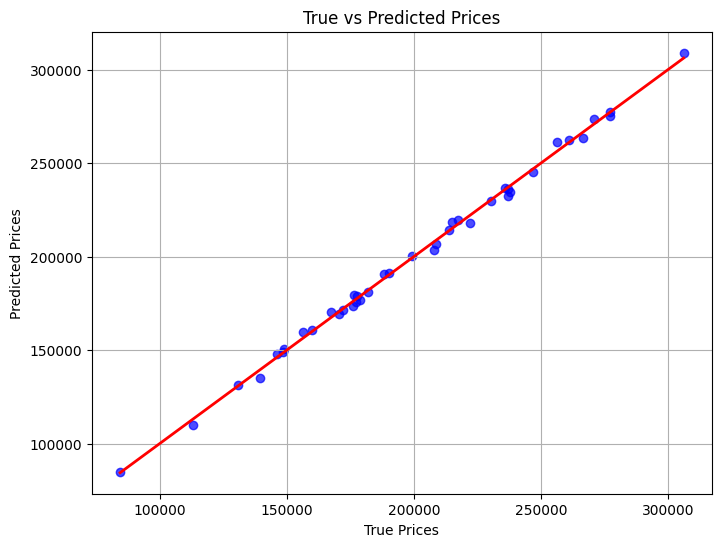

In [1]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Upload the dataset file
from google.colab import files

# File upload
uploaded = files.upload()

# Load the dataset
dataset_filename = list(uploaded.keys())[0]  # Automatically get the uploaded file's name
data = pd.read_csv(dataset_filename)
print("Dataset loaded successfully!")
print(data.head())

# Split the data into features (X) and target (y)
X = data[['SquareFootage', 'Bedrooms', 'Bathrooms']]
y = data['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict prices for the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Display coefficients and intercept
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

# Plot true vs predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('True vs Predicted Prices')
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.grid()
plt.show()
